The images when send to the latent space before training to use less GPU memory.<br>
Before moving forward, let's be sure they contain the information we need.

In [1]:
#Add repo path to the system path
from pathlib import Path
import os, sys
repo_path= Path.cwd().resolve()
while '.gitignore' not in os.listdir(repo_path): # while not in the root of the repo
    repo_path = repo_path.parent #go up one level
sys.path.insert(0,str(repo_path)) if str(repo_path) not in sys.path else None

import torch
import pandas as pd
from matplotlib import pyplot as plt
import random
from diffusers import AutoencoderKL

# define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Visualization of the latent space

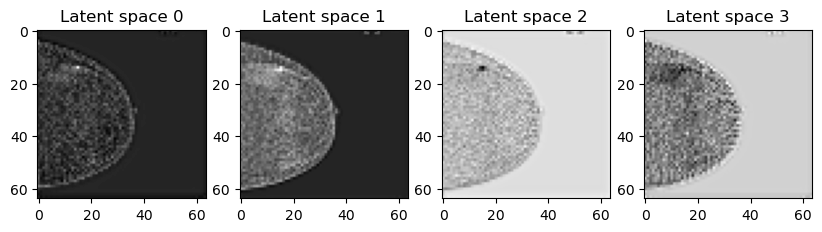

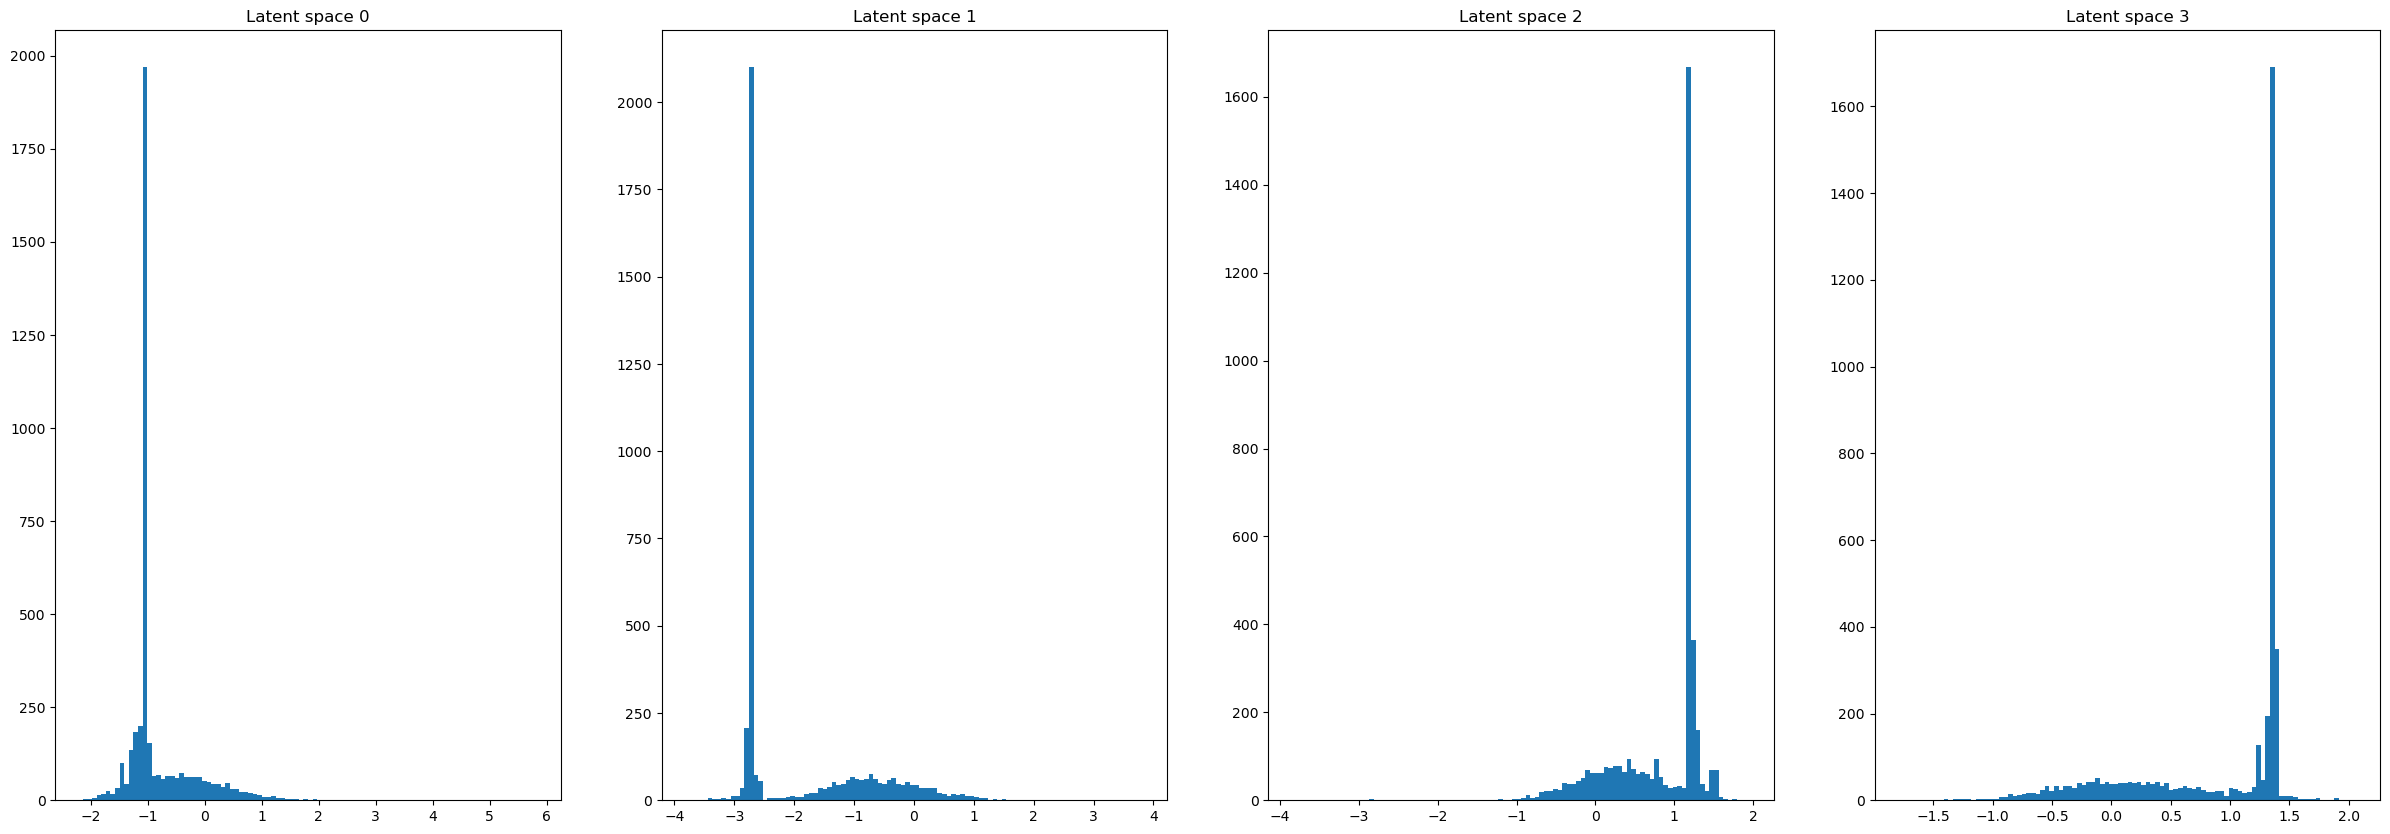

In [2]:
# load an example image
metadata = pd.read_csv(repo_path / 'data/filenames/breast10p_latents.csv', header=None)
# get values of the only available column
im_name = random.choice(metadata.values.ravel())
im_path = repo_path / 'data/images/breast10p_latents'/f'{im_name}'
latent = torch.load(im_path)
# show latent space images
fig, ax = plt.subplots(1,4, figsize=(10,10))
for i in range(4):
    ax[i].imshow(latent[i], cmap='gray')
    ax[i].set_title(f'Latent space {i}')
# show histograms
fig, ax = plt.subplots(1,4, figsize=(30,10))
for i in range(4):
    ax[i].hist(latent[i].flatten(), bins=100)
    ax[i].set_title(f'Latent space {i}')

# Back to image space

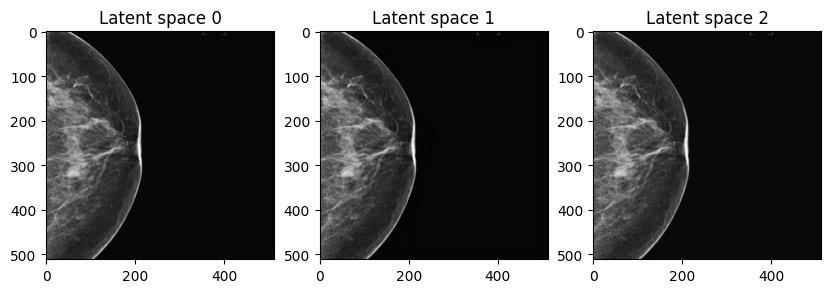

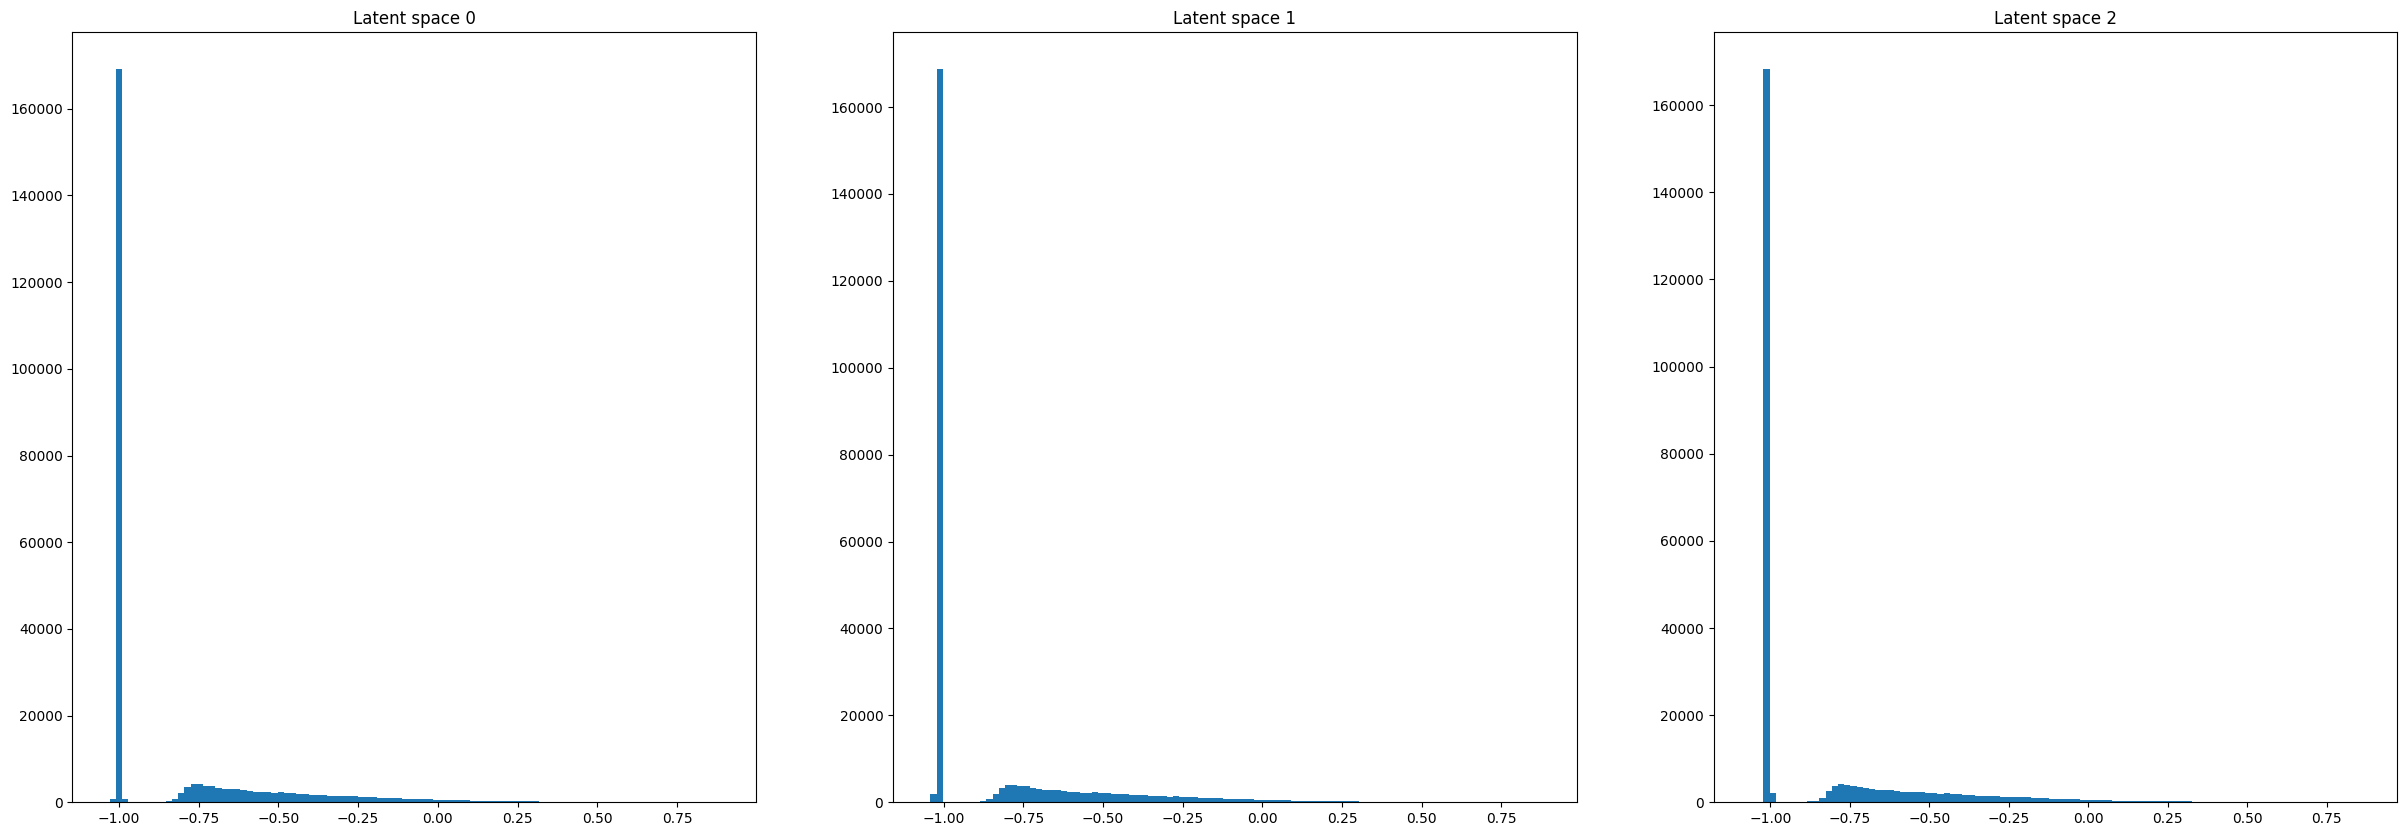

In [13]:
# VAE
vae = AutoencoderKL.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="vae")
vae.requires_grad_(False)
vae.to(device)

pixels = latent.unsqueeze(0) / vae.config.scaling_factor
pixels = pixels.to(device)
# get orignal image
pixels = vae.decode(pixels).sample
pixels = pixels.cpu().detach().numpy()
# plot original image
fig, ax = plt.subplots(1,3, figsize=(10,10))
for i in range(3):
    ax[i].imshow(pixels[0][i], cmap='gray')
    ax[i].set_title(f'Latent space {i}')
# save as png the first channel only
# plt.imsave(f'{im_name}_reconstructed.png', pixels[0][0], cmap='gray')
# show histograms
fig, ax = plt.subplots(1,3, figsize=(30,10))
for i in range(3):
    ax[i].hist(pixels[0][i].flatten(), bins=100)
    ax[i].set_title(f'Latent space {i}')